# Background effects - Final Report
## Image Processing - ICMC USP - 2020


### Authors:
Beatriz Monteiro - 9778619 \
Giovana Craveiro - 9791264 \
Marcelo de Moraes - 9791048 \
Marina Kako - 9763151


### Main objective

This project aims to change the background of a given image with a centered object on it by using image segmentation. The process necessarily includes image segmentation, but might also include background removal, background blur or background change of some kind, such as color change or filtering. The applications of the project are entirely focused on the arts, as aesthetics purposes in photography or personal entertainment. \

In the first place, we are going to implement background change in images with simple backgrounds, that means that they do not have many different colors or objects. For that, thresholding methods are going to be used. In a second moment, we are going to implement the segmentation for images with more complex backgrounds, with algorithms such as image segmentation with clustering. 


### Roles

Beatriz Monteiro: triangle threshold initial test, triangle threshold method, graphic interface, input from the user, connection of the graphic interface and the new clustering method, documentation 


 Giovana Craveiro: initial clustering test, partial report, image resize, clustering method, input from the user, translation of the graphic interface to english, documentation, final report 
 
 
 Marcelo Moraes: edge detector initial test, background identification in triangle-threshold method, background identification in clustering method, connection of the graphic interface and the new clustering method, several bug fixes 
 
 
 Marina Kako: triangle threshold initial test, partial report, triangle threshold method, normalization in the clustering method, several bug fixes, final report 


### Images

The images were acquired in a free banking image website, Burst. The images are shown below. First, the images to be segmented, followed by the backgrounds.

(-0.5, 1079.5, 674.5, -0.5)

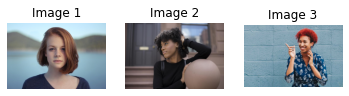

In [14]:
import imageio
import matplotlib.pyplot as plt

girl1 = imageio.imread("girl1.jpg")
girl2 = imageio.imread("girl2.jpg")
girl3 = imageio.imread("girl3.jpg")

plt.subplot(1, 3, 1)
plt.imshow(girl1)
plt.title("Image 1")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(girl2)
plt.title("Image 2")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(girl3)
plt.title("Image 3")
plt.axis('off')

(-0.5, 959.5, 639.5, -0.5)

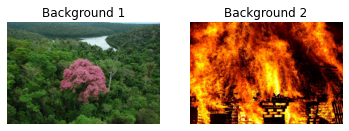

In [13]:
bg1 = imageio.imread("bg_mata.jpg")
bg2 = imageio.imread("bg_fogo.jpg")

plt.subplot(1, 2, 1)
plt.imshow(bg1)
plt.title("Background 1")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(bg2)
plt.title("Background 2")
plt.axis('off')


### Steps
1. Pre-process the image with denoising methods (median filtering) 
2. According to each method of segmentation:
    * Using threshold:
        1. Calculate the histogram for the denoised image
        2. Use the histogram to automatically calculate the threshold value by the Triangle Thresholding Method and apply the threshold to the image, getting a matrix of 0s and 1s. The Triangle Thresholding Method chooses the value that forms the triangle with the biggest d (as shown on the image above) as the threshold. 
        [![Triangle Thresholding](https://aws1.discourse-cdn.com/business4/uploads/imagej/original/1X/c792d7c9ca37e6ebe5c8537ba63b3de143f5d497.png)](https://aws1.discourse-cdn.com/business4/uploads/imagej/original/1X/c792d7c9ca37e6ebe5c8537ba63b3de143f5d497.png)
    * Using clustering:
        1. Apply KMeans method to get the labels and the clusters in the image
        2. Normalize the image and show it to the user on a graphic interface, where he can choose the colors presented on the background by clicking on the pixels

3. Use the altered image as a map to know where to apply the desired effect on the original image
    * For the threshold method: apply the change to every pixel of the line until it reaches a black pixel, then change to the next line. Do this for both the right side and left side of the image. 
    * For the clustering method: for every pixel that is the color chosen by the user, change the background


### Demonstration and results

Using Clustering Method: 

Changing background...
[(156, 195, 215), (112, 159, 180)]


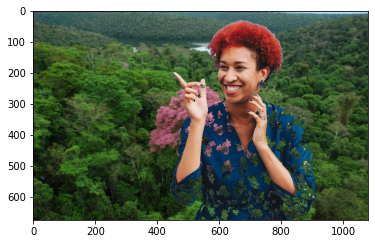

In [1]:
from PIL import ImageTk, Image
import numpy as np
import imageio
from skimage.color import rgb2gray
from triangle_threshold import *
from change_background_clustering import *
from clusteringimgseg import *

img_original = imageio.imread("girl3.jpg")
bg = Image.open("bg_mata.jpg")

img_clustered = clustering(img_original)

colors = [(156, 195, 215), (112, 159, 180)]

# changes background
print("Changing background...")
img_bg_changed = change_background(
    img_original, bg, img_clustered.astype(np.uint8), colors)

plt.imshow(img_bg_changed)


Using thresholding method:

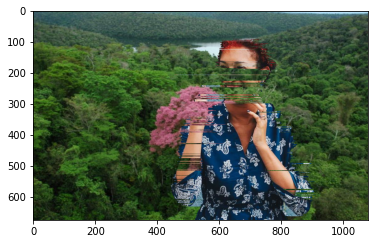

In [2]:
from change_background_thresholding import change_background_thresholding

girl_grayscale = imageio.imread("girl3.jpg", as_gray=True)
img_original = imageio.imread("girl3.jpg")

# image_filtered = median_filter(girl_grayscale, 5)
bool_image = triangle_threshold(girl_grayscale)
final_image = change_background_thresholding(img_original, bg, bool_image)
plt.imshow(final_image)

We can see that although the clustering method works well for this image, the thresholding does not. But in the following example we can see that it is a valid choice depending on the case.

In [ ]:
girl_grayscale = imageio.imread("girl1.jpg", as_gray=True)
img_original = imageio.imread("girl1.jpg")

image_filtered = median_filter(girl_grayscale, 5)
bool_image = triangle_threshold(girl_grayscale)
final_image = change_background_thresholding(img_original, bg, bool_image)
plt.imshow(final_image)

In conclusion, we observed that the thresholding method is efficient for pictures with a strong contrast between the background and the main object. Whereas the clustering does not depend on the contrast, but the colors. It works well if the central object does not have the same color as the background, and these cases are easiest to find, therefore making this method more general. 

Another important observation is that the noise reduction (with median filter) in the pre-processing is relevant for the image segmentation, specially with the thresholding method, as it makes the image's borders less noisy and cleaner. 

The file type is another relevant point to hightlight since we encountered problems with the compression made by JPG files. This problem was fixed by using PNG files instead.

The image results are not perfect, but the task we proposed is a difficult one since the objective did not include the use of machine learning or artificial intelligence of any kind. 

For the future, it would be interesting to join the two methods in one program to get better segmentation results and to implement an automatized way to choose the number of clusters (k) in KMeans.